<a href="https://colab.research.google.com/github/educanto/NLP-movieReview/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


**Import the required packages.**

In [ ]:
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import nltk
from string import punctuation 

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Local directory definition**

In [ ]:
import os
root_path = '/content/gdrive/MyDrive/IA/Processamento de Linguagem Natural/SKLearn - Sentiment Analysis'
os.chdir(root_path)

**Load dataset**

In [ ]:
dataset_path = 'dataset'

data = load_files(dataset_path)
x_raw, y = data.data, data.target
x_raw = [text.decode('utf-8') for text in x_raw]

In [ ]:
label = {0:'neg',1:'pos'}

**See some data**

In [ ]:
print(x_raw[0])
print(y[0])

arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . 
it's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? 
once again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . 
in this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . 
with the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! 
parts of this are actually so absurd , that they would fit right in with dogma . 
yes , the film is that wea

In [ ]:
print(x_raw[1])
print(y[1])

good films are hard to find these days . 
great films are beyond rare . 
proof of life , russell crowe's one-two punch of a deft kidnap and rescue thriller , is one of those rare gems . 
a taut drama laced with strong and subtle acting , an intelligent script , and masterful directing , together it delivers something virtually unheard of in the film industry these days , genuine motivation in a story that rings true . 
consider the strange coincidence of russell crowe's character in proof of life making the moves on a distraught wife played by meg ryan's character in the film -- all while the real russell crowe was hitching up with married woman meg ryan in the outside world . 
i haven't seen this much chemistry between actors since mcqueen and mcgraw teamed up in peckinpah's masterpiece , the getaway . 
but enough with the gossip , let's get to the review . 
the film revolves around the kidnapping of peter bowman ( david morse ) , an american engineer working in south america who is k

**Pre-processing**

In [ ]:
stop_words =  stopwords.words('english')
def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return text

In [ ]:
x = [text_cleaning(text) for text in x_raw]
x[0]

'arnold schwarzenegger icon action enthusiast since late lately film sloppy one liner getting worse hard seeing arnold mr freeze batman robin especially say ton ice joke hey got million matter arnold signed another expensive blockbuster compare like terminator series true lie even eraser called dark thriller devil gabriel byrne come upon earth impregnate woman robin tunney happens every year basically destroy world apparently god chosen one man one man jericho cane arnold help trusty sidekick kevin pollack stop nothing let devil take world part actually absurd would fit right dogma yes film weak better blockbuster right sleepy hollow make world enough look like star film anyway definitely seem like arnold movie type film see sure gave u chuckle well known one liner seemed confused character film going understandable especially ending changed according source aside form still walked much like past film sorry say arnold maybe end action day speaking action film hardly explosion fight dev

**Split train and test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y,)

**Train model**

In [ ]:
model = RandomForestClassifier(n_estimators=1000, random_state=0)

classifier = Pipeline(steps=[('pre_processing',TfidfVectorizer(lowercase=False)),('ensemble',model)])

classifier.fit(x_train, y_train) 

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('ensemble',
                 RandomForestClassifier(n_estimators=1000, random_state=0))])

**Test model**

In [ ]:
y_pred = classifier.predict(x_test)

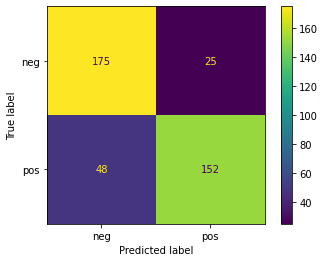

{0: 'neg', 1: 'pos'}
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       200
           1       0.86      0.76      0.81       200

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

0.8175


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=label.values())

disp.plot()
plt.show()

print(label)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

**Save model**

In [ ]:
with open('text_classifier', 'wb') as picklefile:
    pickle.dump(classifier, picklefile)

**Load model**

In [ ]:
with open('text_classifier', 'rb') as training_model:
    model_loaded = pickle.load(training_model)

**Test loaded model**

In [ ]:
y_pred2 = model_loaded.predict(x_test)

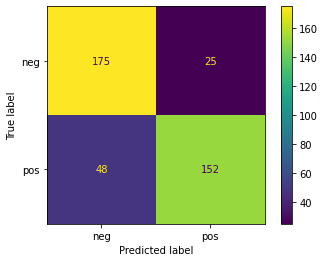

{0: 'neg', 1: 'pos'}
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       200
           1       0.86      0.76      0.81       200

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

0.8175


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=label.values())

disp.plot()
plt.show()

print(label)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

**Single preds**

In [ ]:
def predict(review, model, label):
    cleaned_review = text_cleaning(review)

    prediction = model_loaded.predict([cleaned_review])
    output = int(prediction[0])
    probas = model_loaded.predict_proba([cleaned_review])
    output_probability = "{:.2f}".format(float(probas[:, output]))

    # output dictionary
    sentiments = {0: "Negative", 1: "Positive"}

    # show results
    result = {"prediction": sentiments[output], "Probability": output_probability}

    return result

In [ ]:
review = 'The Shawshank Redemption is a cinematic masterpiece that will leave you with a sense of hope and admiration for the human spirit'

print(predict(review, model_loaded, label))

{'prediction': 'Positive', 'Probability': '0.56'}
